## 5. Clustering
### 1. K-means
Is a method of vector quantization. It partitions n observations into k clusters, in each observation belongs to the cluster with the nearest mean.
#### 1. Create the model
We create the model using the lemmatized lyrics from previous steps.

In [1]:
import pickle
import gensim.corpora as corpora

#LOAD LYRICS from disk
lyrics = list()
with open ('../dataset/lemma_lyrics', 'rb') as fp:
    lyrics = pickle.load(fp)

new_lyrics = list()
for lyric in lyrics:
    new_lyrics.append(' '.join(lyric))
    
print(lyrics[0])
print(new_lyrics[0])

lyrics = new_lyrics
del new_lyrics

C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


['be', 'not', 'ever', 'trap', 'bando', 'lord', 'do', 'not', 'get', 'wrong', 'know', 'couple', 'niggas', 'be', 'place', 'everybody', 'know', 'name', 'say', 'get', 'watch', 'attitude', 'see', 'money', 'man', 'start', 'actin', 'strange', 'fuck', 'fuck', 'never', 'say', 'be', 'brand_new', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'have', 'talkin', 'shit', 'nigga', 's', 'regular', 'have', 'love', 'thick', 'life', 'spectacular', 'spend', 'be', 'die', 'rich', 'nigga', 'be', 'flexin', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'everyday', 'see', 'wanna', 'hot', 'singer', 'swear', 'sound', 'start', 'bottom', 'far', 'motto', 'niggasll', 'never', 'drake', 'shout', 'ovo', 'prolly', 'do', 'not', 'know', 'stay', 'cut', 'do', 'not', 'fuck', 'body', 'that', 's', 'pun', 'nobody', 'know', 'name', 'runnin', 'dream', 'be', 'not', 'hard', 'break', 'bread', 'swear', 'pull', 'plate', 'eat', 'starve', 'be', 'winnin', 'crew', 'c

This time we will use Tf-idf from sklearn

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
data = vectorizer.fit_transform(lyrics)
del lyrics

We iterate over the dataset 10 times using different number of clusters.

In [ ]:
%%time
from sklearn.cluster import KMeans
import pickle

Sum_of_squared_distances = []
K = range(10, 100, 10)
for n_clusters in K:    
    tempModel = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=20, n_init=4)
    tempModel.fit(data)
    Sum_of_squared_distances.append(tempModel.inertia_)


#### 4. Cluster evaluation: elbow method
After every cluster iteration we use the elbow method to evaluate the best number of clusters. The elbow method consist in ploting the sum of squared distances (kmeans.inertia_) and choosing the point when the sum stops changin greatly.

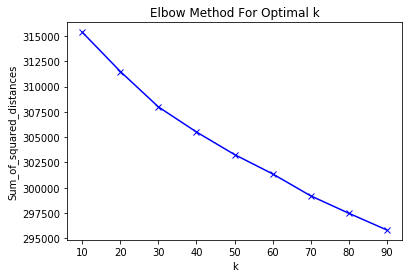

In [10]:
import matplotlib.pyplot as plt
K2 = range(10, 100, 10)
plt.plot(K2, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see in the plot above there is no 'elbow' that can help us choose a k number of clusters.

#### 5. Cluster evaluation: silhouette score 
The silhouette score consists in evaluating how each point is similar to its own cluster compared to others.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

scores = []
K = range(10, 100, 10)
for n_clusters in K:    
    tempModel = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=20, n_init=4)
    tempModel.fit(data)
    labels = tempModel.labels_
    score = silhouette_score(data, labels)
    scores.append(score)
    print("Score: ", score, " n_clusters: ", n_clusters)

After printing the scores we can see they are very close to 0, the clusters are overlapping each other.

In [4]:
scores

[0.0020336569947606875,
 0.004157091931192911,
 0.0056160164298180775,
 0.007787862496433393,
 0.008092028620073875,
 0.009941292867576557]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

scores = []
K = range(200, 200, 100)
for n_clusters in K:    
    tempModel = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=20, n_init=4)
    tempModel.fit(data)
    labels = tempModel.labels_
    score = silhouette_score(data, labels)
    scores.append(score)
    print("Score: ", score, " n_clusters: ", n_clusters)

Using 200 clusters throws a very similar score.

In [6]:
scores

[0.025070652690301603]

### 6. Visualizing with truncated SVD
We will plot the data using 4 clusters.

In [15]:
n_clusters = 6
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=20, n_init=4)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=20,
    n_clusters=6, n_init=4, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Here we print the top terms per cluster

In [16]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

#save model
with open('../dataset/kmeans_model', 'wb') as fp:
    pickle.dump(model, fp)

Top terms per cluster:
Cluster 0:
 know
 want
 say
 feel
 let
 time
 tell
 make
 love
 think
Cluster 1:
 baby
 love
 know
 want
 come
 let
 make
 girl
 say
 good
Cluster 2:
 nigga
 fuck
 niggas
 bitch
 shit
 know
 ass
 money
 niggaz
 man
Cluster 3:
 come
 know
 love
 make
 say
 man
 let
 good
 time
 little
Cluster 4:
 day
 ill
 time
 come
 dream
 heart
 away
 love
 night
 life
Cluster 5:
 love
 know
 heart
 make
 say
 feel
 let
 time
 ill
 way


Now we need to reduce the dimensionality of the dataset for plotting, we will use truncated singular value decomposition. With the reduced data we will traing a kmeans cluster and plot it.

SVD is a matrix decomposition method for reducing a matrix. It is used for dimensionality reduction and if mixed with a tfidf corpus is called LSA.

In [17]:
from sklearn.decomposition import TruncatedSVD

reduced_data = TruncatedSVD(n_components=2).fit_transform(data)

model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100)
model.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

C:\Users\jescobedo\AppData\Local\Continuum\anaconda3\envs\ml\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


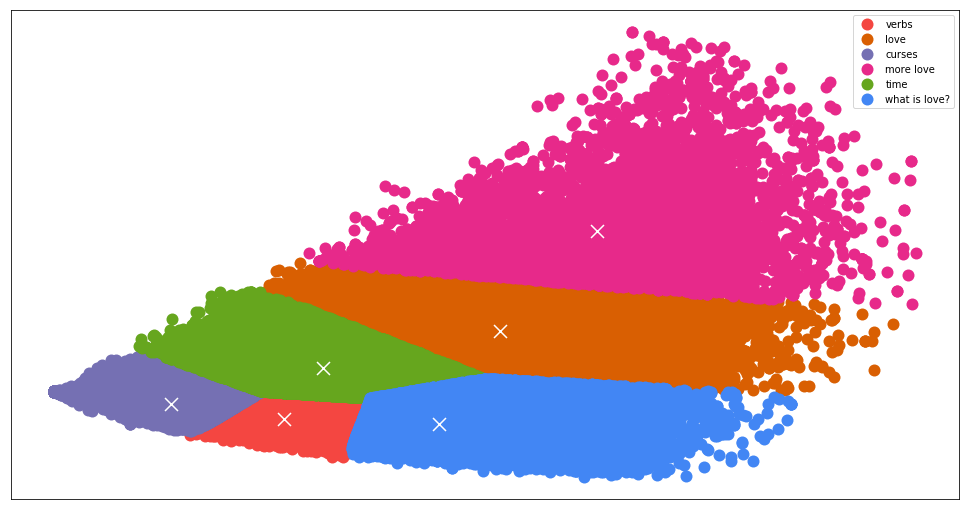

In [18]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd

xs, ys = reduced_data[:, 0], reduced_data[:, 1]
#set up colors per clusters using a dict
cluster_colors = {0: '#f44641', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#4286f4'}

#set up cluster names using a dict
cluster_names = {0: 'verbs', 
                 1: 'love', 
                 2: 'curses', 
                 3: 'more love', 
                 4: 'time', 
                 5: 'what is love?'}


#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=model.labels_.tolist())) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point    

# Plot the centroids as a white X
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    
plt.show() #show the plot